In [ ]:
# Objectives

# i) Initial data exploration and data visualization
# ii) Feature engineering--creating new features
# iii) Discover if data possess any structure
# iv) Data pipelining for data processing and modeling
# v)  Cross-validation
# vi) Hyperparameter tuning both using Grid Search and Randomized Search

# Call Libraries

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# For Displaying outputs of all commands from a cell and not just for the last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings   # Import warnings module
# To do not print warnings on screen
warnings.filterwarnings("ignore")

import zipfile # To help read zip file
from sklearn.compose import ColumnTransformer

# For splitting dataset into training and testing data
from sklearn.model_selection import train_test_split


# Transformers :
# Class for imputing missing values
from sklearn.impute import SimpleImputer

# One hot encoder for categorical data
from sklearn.preprocessing import OneHotEncoder as onehot

# For Scaling numeric data
from sklearn.preprocessing import StandardScaler as ss

# Label encoder for transforming target column
from sklearn.preprocessing import LabelEncoder

# Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from xgboost.sklearn import XGBClassifier

# Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

#Estimator
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Plotting Modules
from xgboost import plot_importance

# Permutation feature importance
from sklearn.inspection import permutation_importance

# Misc
import time
import os
import gc
import random

# Used in Randomized parameter search
from scipy.stats import uniform

from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import set_config
#     pip install scikit-optimize
#     pip install 'scikit-optimize[plots]'
#     Refer: https://github.com/scikit-optimize/scikit-optimize
#     conda install -c conda-forge scikit-optimize
#from skopt import BayesSearchCV 
#from skopt.space import Real, Categorical, Integer

In [2]:
!pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 558 kB 4.6 MB/s 


In [3]:
import dabl

# Read Data

In [4]:
# From a cell display outputs from multiple commands:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# Mount google drive:
from google.colab import drive

In [7]:
drive.mount('/gdrive')

Mounted at /gdrive


In [8]:
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Read folder containing data file
import os 
path = "/content/drive/MyDrive/BDDA/housing.csv "

In [11]:
# Read already processed housing file 
housing=pd.read_csv("/content/sample_data/housing.csv")

# Data Exploration

In [12]:
# To show first 5 rows of the dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
# To show last 5 rows of the dataset
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [14]:
# To check the information regarding different columns of the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
# Counting the number of rows and columns
housing.shape

 # There are 10 columns & 20640 rows in the dataset

(20640, 10)

In [16]:
# Checking for duplicate values
housing.duplicated().sum()
                       
# There are no duplicate values

0

In [17]:
# Determining statistical measures of numerical values in the dataset
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [18]:
# Returns the column labels of data
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [19]:
# Counting number of different types of items in the categorical column
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [20]:
print("\n\nTarget distribution")
housing.median_house_value.value_counts()



Target distribution


500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: median_house_value, Length: 3842, dtype: int64

In [21]:
# Crosstab between the ocean_proximity and the number of households
pd.crosstab(housing.ocean_proximity,housing.households)

households,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,4372.0,4490.0,4616.0,4769.0,4855.0,4930.0,5050.0,5189.0,5358.0,6082.0
ocean_proximity,,,,,,,,,,,,,,,,,,,,,
<1H OCEAN,0,0,0,3,1,2,4,2,3,4,...,1,1,0,1,0,1,1,1,0,1
INLAND,0,3,2,0,3,3,4,5,3,2,...,0,0,1,0,1,0,0,0,1,0
ISLAND,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NEAR BAY,1,0,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
NEAR OCEAN,0,0,2,0,2,0,1,0,2,1,...,0,0,0,0,0,0,0,0,0,0


# Data Visualization

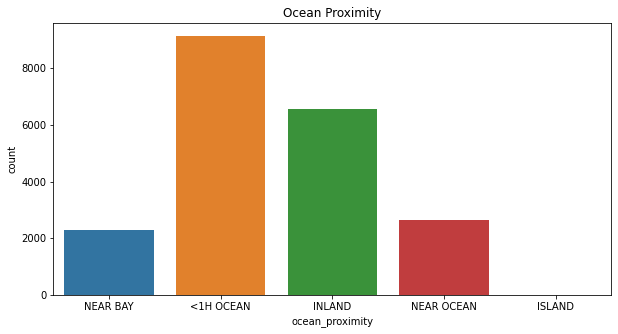

In [22]:
plt.figure(figsize=(10,5))
plt.title('Ocean Proximity')
sns.countplot(x=housing["ocean_proximity"]);

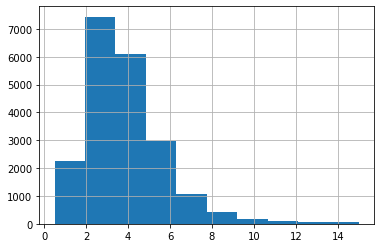

In [23]:
housing['median_income'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e74329550>,
      dtype=object)

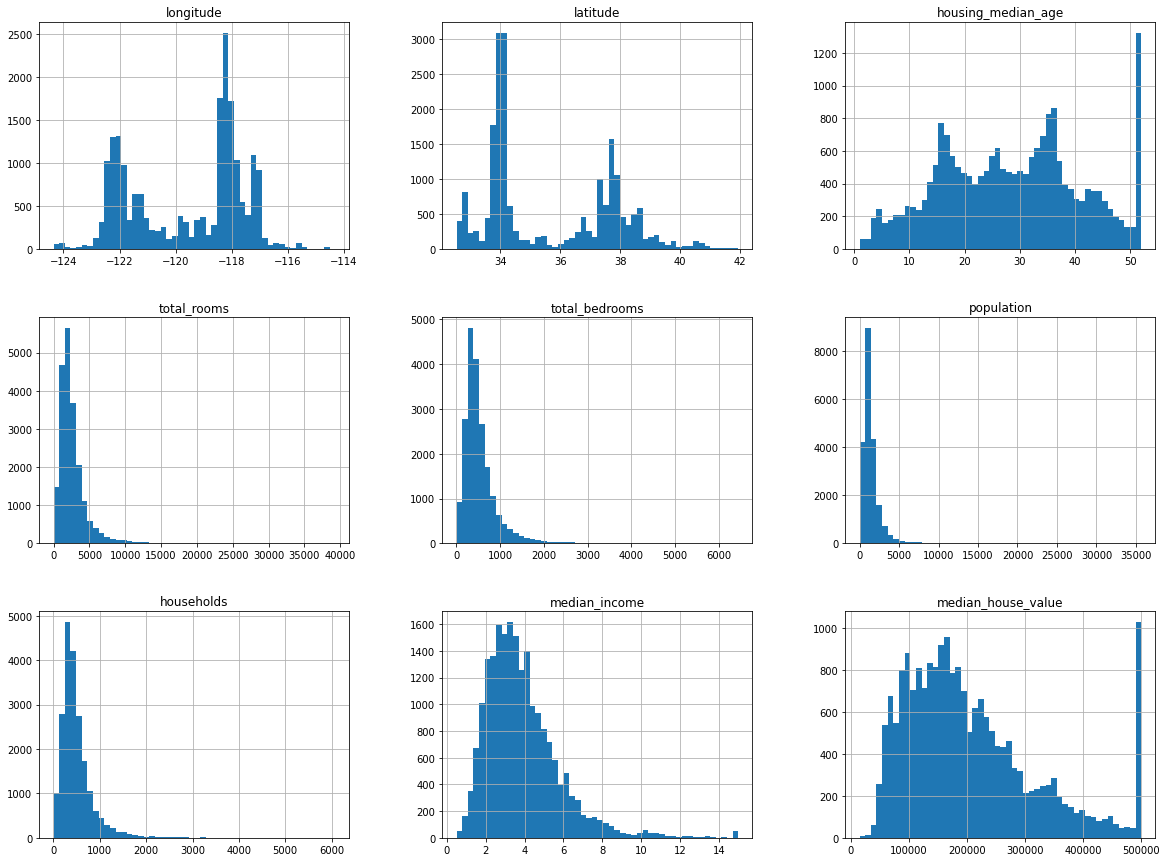

In [24]:
# Plotting histogram of numerical data
import matplotlib.pyplot as plt

housing.hist(bins = 50 , figsize = (20,15))
plt.show()

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Location of Population')

Text(0.5, 0, 'Ocean Proximity')

Text(0, 0.5, 'Population')

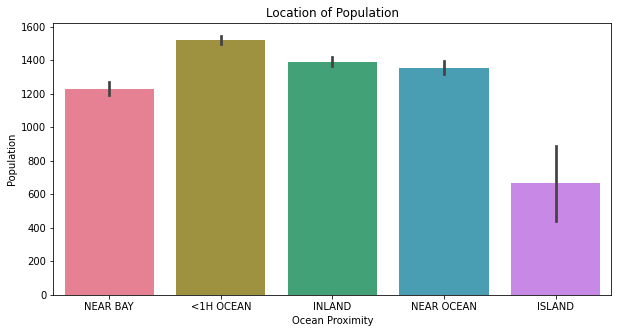

In [25]:
# Checking the Median Income of the number of households
plt.figure(figsize=(10,5))
sns.barplot(x='ocean_proximity',y='population',data=housing, palette='husl')

plt.title('Location of Population')
plt.xlabel('Ocean Proximity')
plt.ylabel('Population')
plt.show()

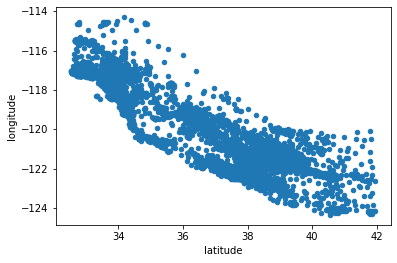

In [26]:
housing.plot(kind = 'scatter', x = 'latitude', y = 'longitude')

# It is hard to see any particluar pattern
# We can not visualize the places with high density points

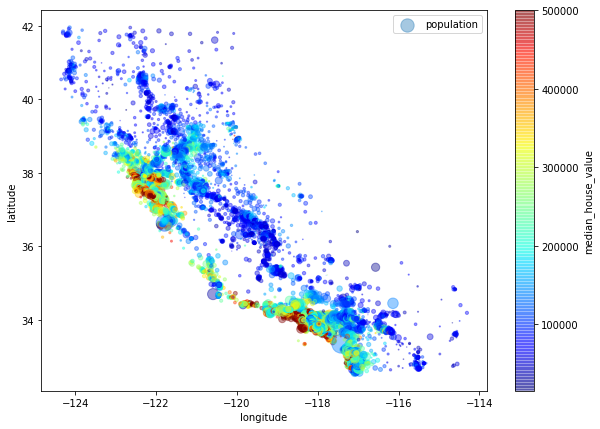

In [27]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
             s = housing['population']/100, label = 'population', figsize = (10,7),
             c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True,
             sharex = False)
plt.legend()

# housing['population']/100 = Radius of the circle
# cmap = plt.get_cmap('jet') here, jet is the rbg range of colors

# In Northern California the housing prices in coastal districts are not too high

Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e73411d10>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e6f91e7d0>]],
       dtype=object)]

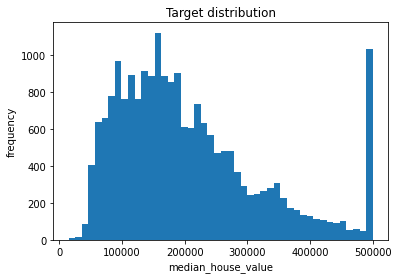

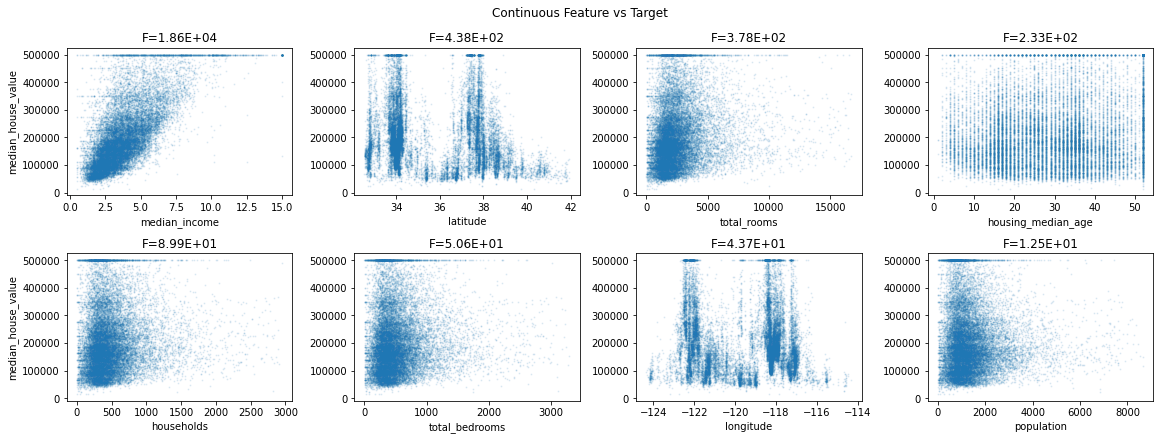

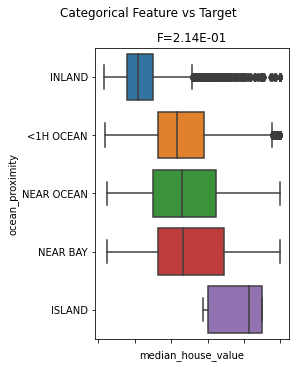

In [28]:
dabl.plot(housing, 'median_house_value')

In [29]:
# Finding Correlation
corrMatrix=housing.corr()
corrMatrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [30]:
corrMatrix['median_house_value']
corrMatrix['median_house_value'].sort_values(ascending = False)

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<Figure size 648x504 with 0 Axes>

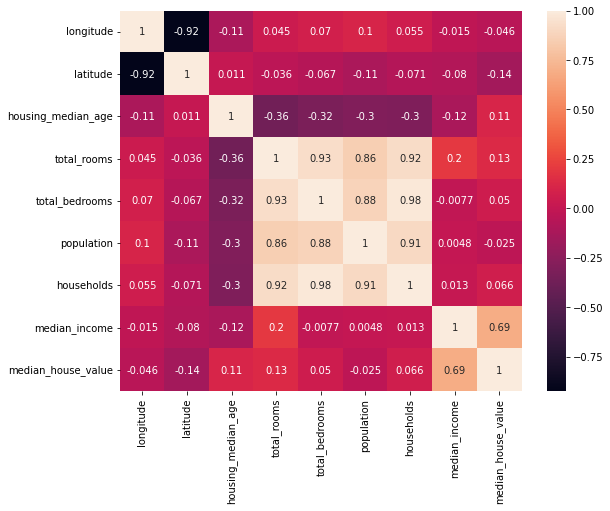

In [31]:
# It is the two-dimensional graphical representation of the data 
plt.figure(figsize=(9,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()        

# It can be concluded that places where median_house_value is higher, median_income group of people are also higher.
# Latitude is negatively correlated to the median_house_value.


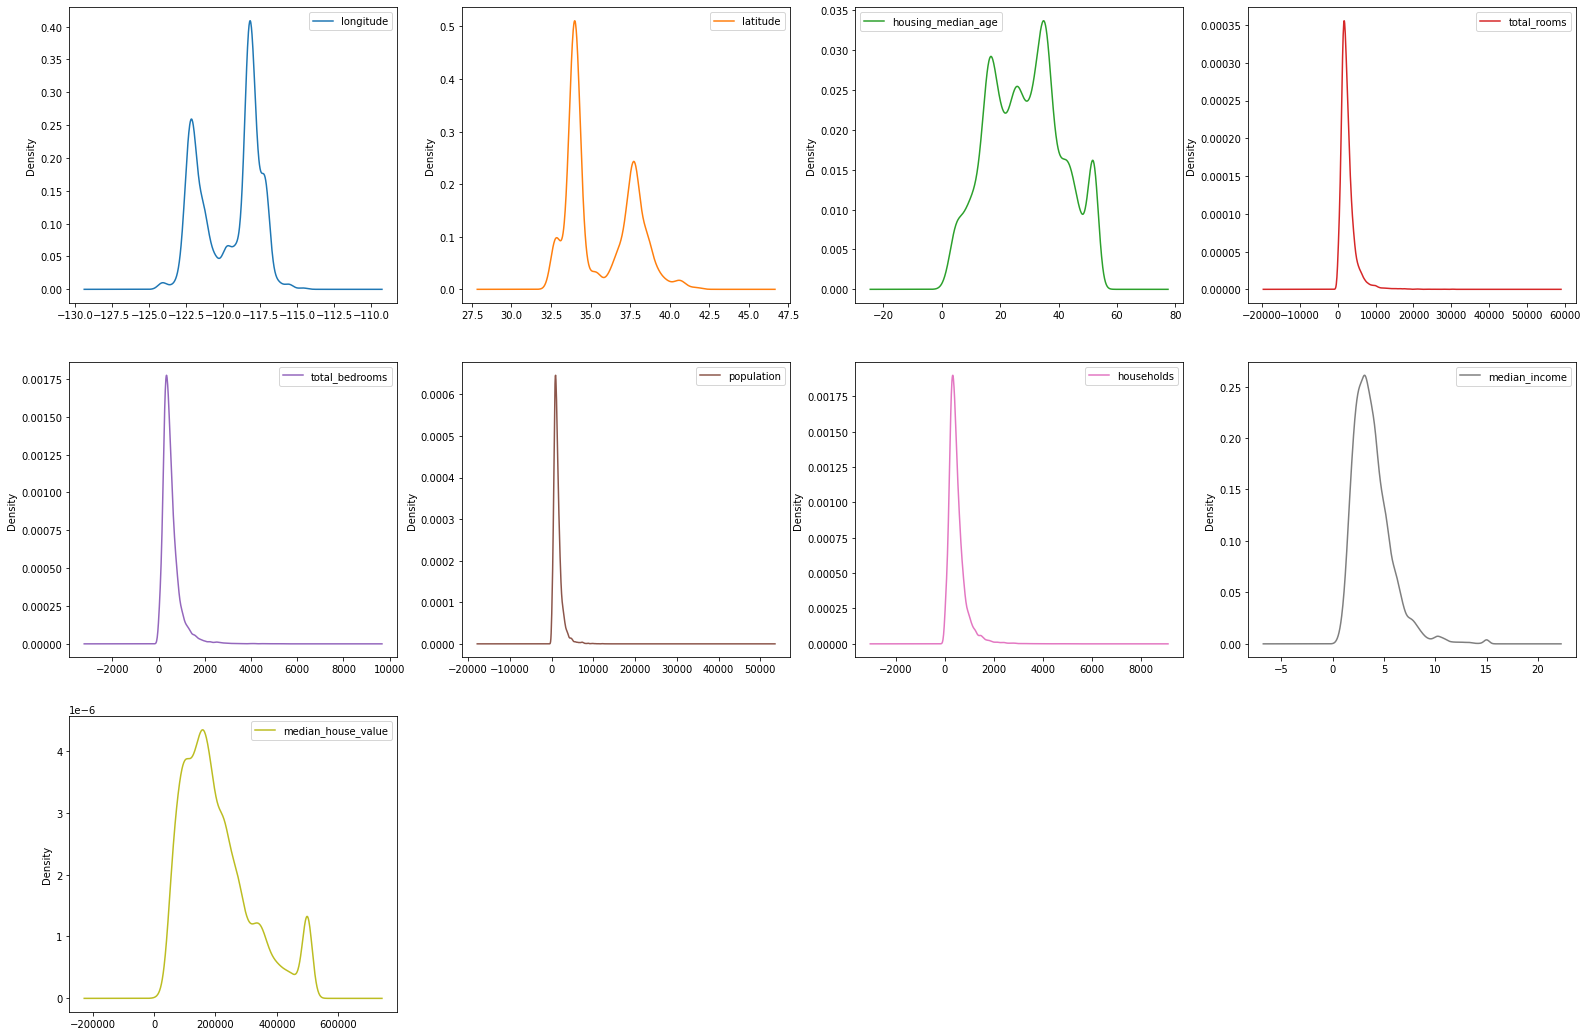

In [32]:
housing.plot(kind="kde", subplots=True, layout=(4,4), figsize=(27,25),sharex=False, sharey=False);

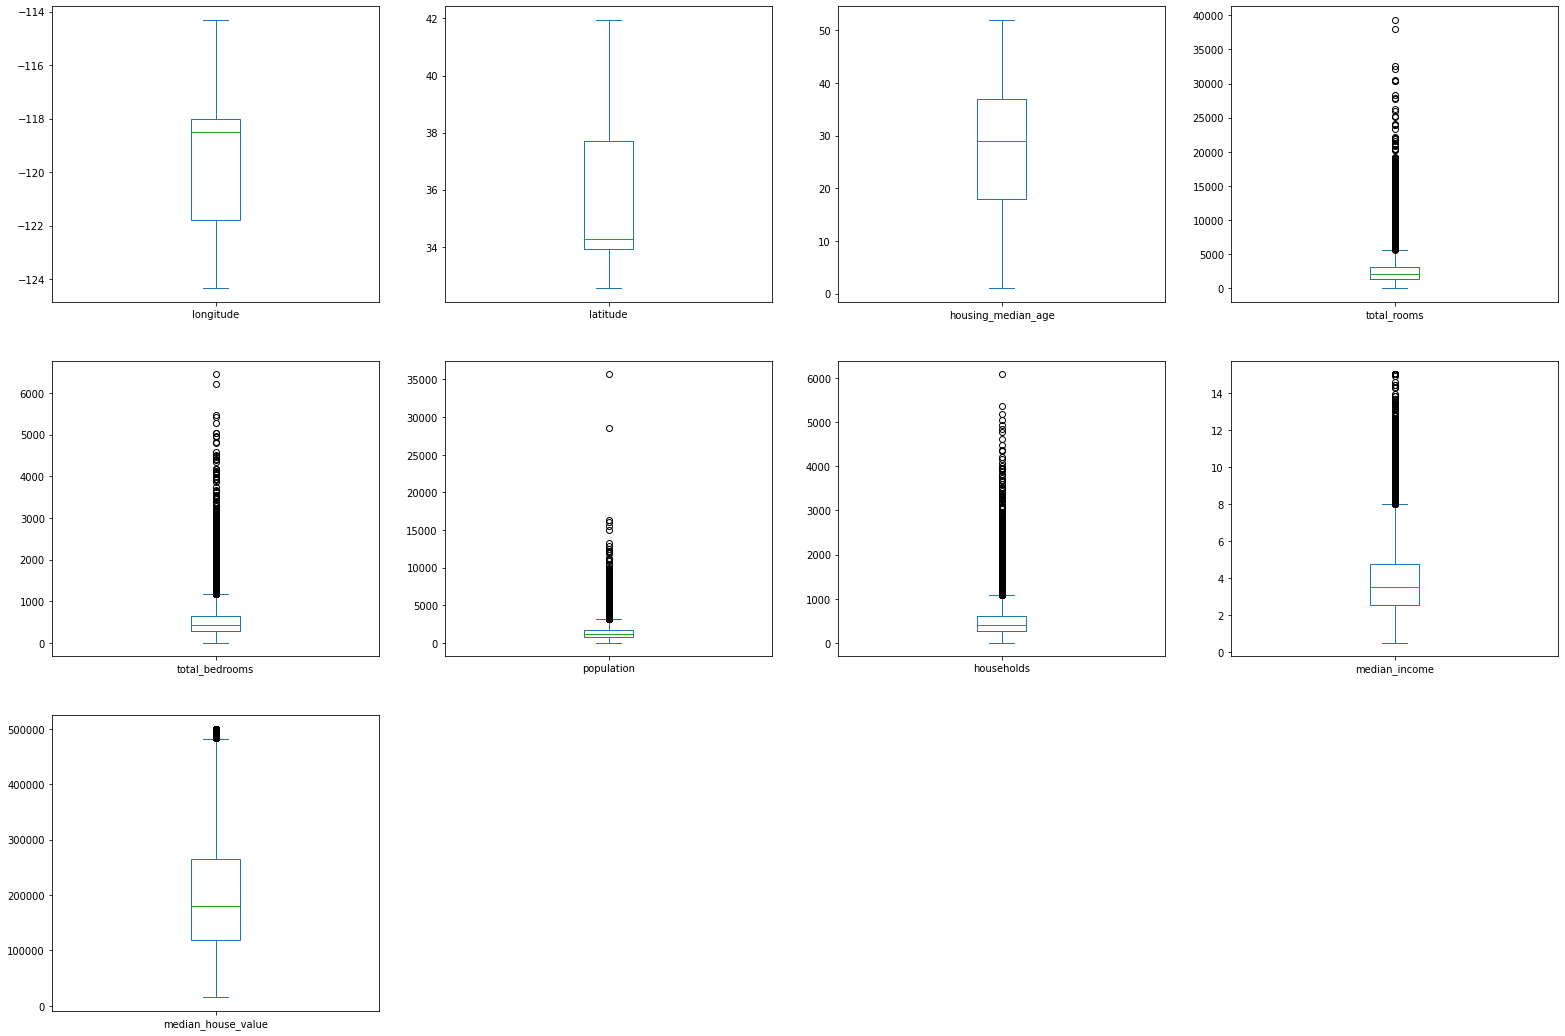

In [33]:
housing.plot(kind="box", subplots=True, layout=(4,4), figsize=(27,25),sharex=False, sharey=False);

# Feature Preparation

In [34]:
# Checking for missing value
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [35]:
housing_processed=housing.dropna()

In [36]:
housing_processed.shape

(20433, 10)

In [37]:
#Ceil is used to round of the values in an array
np.ceil(housing_processed['median_income']/1.5)

housing_processed['income_cat'] = np.ceil(housing_processed['median_income']/1.5)

0        6.0
1        6.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: median_income, Length: 20433, dtype: float64

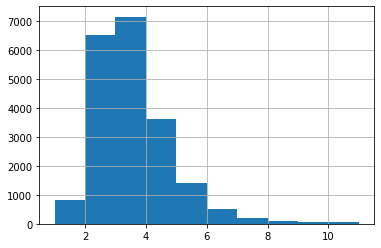

In [38]:
housing_processed['income_cat'].hist()

In [39]:
housing_processed['income_cat'].value_counts()

# After reducing the size of the important column and rounding off by using np.ceil(),we got 11 different stratas

3.0     7156
2.0     6515
4.0     3611
5.0     1408
1.0      814
6.0      527
7.0      186
8.0      104
9.0       50
11.0      48
10.0      14
Name: income_cat, dtype: int64

In [40]:
housing_processed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [41]:
housing_processed=housing_processed[housing_processed['ocean_proximity'] != 'NEAR BAY']

In [45]:
housing_processed=housing_processed.drop('ocean_proximity', axis=1)

In [46]:
housing_processed=housing_processed.drop('longitude', axis=1)

In [47]:
housing_processed=housing_processed.drop('latitude', axis=1)

In [48]:
housing_processed=housing_processed.drop('housing_median_age', axis=1)

In [49]:
housing_processed=housing_processed.drop('total_bedrooms', axis=1)

In [50]:
index_names=housing_processed[housing_processed['total_rooms'] <= 1400.0].index

In [51]:
housing_processed=housing_processed.drop(index_names)

In [52]:
housing_processed.shape

(13971, 6)

In [53]:
housing_processed.head()

,total_rooms,population,households,median_income,median_house_value,income_cat
830,3666.0,2341.0,703.0,4.6458,217000.0,4.0
859,4342.0,2172.0,789.0,4.6146,247600.0,4.0
860,3575.0,1777.0,559.0,5.7192,283500.0,4.0
861,4126.0,2079.0,975.0,3.6832,216900.0,3.0
862,2878.0,1276.0,485.0,6.2073,282500.0,5.0


In [54]:
# Dividing data into predictors and target

# 4th index or 5th column is target
print("\n\nTarget,y, values")
Y = housing_processed.iloc[ : , 4:5]
Y.head()

x = housing_processed.drop(["median_house_value"],axis=1)

#y = housing_processed.median_house_value



Target,y, values


,median_house_value
830,217000.0
859,247600.0
860,283500.0
861,216900.0
862,282500.0


In [55]:
x.head()

,total_rooms,population,households,median_income,income_cat
830,3666.0,2341.0,703.0,4.6458,4.0
859,4342.0,2172.0,789.0,4.6146,4.0
860,3575.0,1777.0,559.0,5.7192,4.0
861,4126.0,2079.0,975.0,3.6832,3.0
862,2878.0,1276.0,485.0,6.2073,5.0


In [56]:
Y.shape

(13971, 1)

In [57]:
housing_processed.columns

Index(['total_rooms', 'population', 'households', 'median_income',
       'median_house_value', 'income_cat'],
      dtype='object')

In [58]:
# Defining numerical and categorical variables
num_cols =['total_rooms', 'population', 'median_income',
       'median_house_value', 'income_cat']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[cat_cols] = x[cat_cols].apply(le.fit_transform)

In [60]:
x.head()

,total_rooms,population,households,median_income,income_cat
830,3666.0,2341.0,703.0,4.6458,4.0
859,4342.0,2172.0,789.0,4.6146,4.0
860,3575.0,1777.0,559.0,5.7192,4.0
861,4126.0,2079.0,975.0,3.6832,3.0
862,2878.0,1276.0,485.0,6.2073,5.0


In [61]:
Y.head()

,median_house_value
830,217000.0
859,247600.0
860,283500.0
861,216900.0
862,282500.0


In [62]:
Y.value_counts()

median_house_value
500001.0              639
137500.0               48
162500.0               45
225000.0               33
150000.0               33
                     ... 
349900.0                1
238400.0                1
87400.0                 1
237800.0                1
22500.0                 1
Length: 3571, dtype: int64

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = Y.apply(le.fit_transform)

In [64]:
# Can we change datatype to float32 ?

x.min().min()             # 0.0
x = x.astype('float32')   # Saves memory


0.6775

In [65]:
x.max().max()             # 39320.0
x = x.astype('float32')

39320.0

In [66]:
# Storing column names for use in feature importance

colnames = x.columns.tolist()

# Split Data into Train & Test

In [67]:
# Split dataset into train and validation parts

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2)

# Here we are using the split ratio of 80:20. The 20% testing data set.                                                  

In [68]:
print("shape of original dataset :", housing.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", Y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", Y_test.shape)

shape of original dataset : (20640, 10)
shape of input - training set (11176, 5)
shape of output - training set (11176, 1)
shape of input - testing set (2795, 5)
shape of output - testing set (2795, 1)


In [69]:
Y_test.head()

,median_house_value
11900,1727
10562,3133
6033,851
9542,433
4171,2044


# Cross Validation

In [70]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

In [71]:
iris=load_iris()

In [72]:
a=iris.data

In [73]:
b=iris.target

In [74]:
logreg=LogisticRegression()

In [75]:
kf=KFold(n_splits=5) 

In [76]:
score=cross_val_score(logreg,a,b,cv=kf)

In [77]:
print("Cross Validation Scores are {}".format(score))

Cross Validation Scores are [1.         1.         0.86666667 0.93333333 0.83333333]


In [78]:
print("Average Cross Validation score :{}".format(score.mean()))

Average Cross Validation score :0.9266666666666665


# Data Pipeline
Create a pipeline for data processing and modeling. We will then use Grid Search and Random Search to find best set of parameters for this pipeline.

In [79]:
# Create pipe for both numerical as also categorical data
nc_pipe = Pipeline([ ('impute', SimpleImputer(strategy = 'median')), ('ss',ss() )])
cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), ('ohe', onehot())])

In [81]:
# Test each pipe
nc_pipe.fit_transform(housing_processed[num_cols])

array([[ 0.21497107,  0.54390115,  0.34449896,  0.07695326,  0.63913091],
       [ 0.51055189,  0.40303296,  0.32784238,  0.34589555,  0.63913091],
       [ 0.17518135,  0.07378481,  0.91754946,  0.66141935,  0.63913091],
       ...,
       [-0.40242555, -0.56804069, -1.22816004, -1.01903051, -0.91853118],
       [-0.57470195, -0.78976223, -1.13889784, -1.08582663, -0.91853118],
       [-0.17024594, -0.25129564, -0.86054072, -1.0445185 , -0.91853118]])

In [82]:
 #Now put the two pipes within one column-transformer
ct = ColumnTransformer(
                        [
                        ('nc_pipe',nc_pipe,num_cols)
                        ]
                       )

In [83]:
# Test this column transformer pipe
ct.fit_transform(housing_processed)

array([[ 0.21497107,  0.54390115,  0.34449896,  0.07695326,  0.63913091],
       [ 0.51055189,  0.40303296,  0.32784238,  0.34589555,  0.63913091],
       [ 0.17518135,  0.07378481,  0.91754946,  0.66141935,  0.63913091],
       ...,
       [-0.40242555, -0.56804069, -1.22816004, -1.01903051, -0.91853118],
       [-0.57470195, -0.78976223, -1.13889784, -1.08582663, -0.91853118],
       [-0.17024594, -0.25129564, -0.86054072, -1.0445185 , -0.91853118]])

In [84]:
# Final pipe to bring in the column-transformer followed by estimator
pt = Pipeline([ 
                ('ct',ct), 
                ('classifier', DecisionTreeClassifier())])

In [85]:
# Your train data
y_train = housing_processed.median_house_value
X_train = housing_processed.drop('median_house_value', axis=1)

In [86]:
set_config(display='diagram')
pt

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('nc_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['total_rooms', 'population',
                                                   'median_income',
                                                   'median_house_value',
                                                   'income_cat'])])),
                ('classifier', DecisionTreeClassifier())])

In [87]:
### Pipe using XGBoost

## Pipeline steps
# steps: List of (name, transform) tuples
#       (implementing fit/transform) that are
#       chained, in the order in which they
#       are chained, with the last object an
#       estimator.
#      Format: [(name, transformer), (name, transformer)..(name, estimator)]

from sklearn.preprocessing import StandardScaler as ss
from xgboost.sklearn import XGBClassifier

steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)       
            )
            ]


In [88]:
# Instantiate Pipeline object

pipe_xg = Pipeline(steps_xg)

# Grid Search
It is done to discover best pipeline parameters. Grid search misses the Objective function completely

In [89]:
# Deciding what parameters in the pipe are available for tuning
from sklearn.model_selection import GridSearchCV

print("\n\n--Which parameters can be tuned?--\n\n")
pipe_xg.get_params()



--Which parameters can be tuned?--




{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg', XGBClassifier(n_jobs=3, silent=False))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBClassifier(n_jobs=3, silent=False),
 'sts__copy': True,
 'sts__with_mean': True,
 'sts__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'xg__base_score': 0.5,
 'xg__booster': 'gbtree',
 'xg__colsample_bylevel': 1,
 'xg__colsample_bynode': 1,
 'xg__colsample_bytree': 1,
 'xg__gamma': 0,
 'xg__learning_rate': 0.1,
 'xg__max_delta_step': 0,
 'xg__max_depth': 3,
 'xg__min_child_weight': 1,
 'xg__missing': None,
 'xg__n_estimators': 100,
 'xg__n_jobs': 3,
 'xg__nthread': None,
 'xg__objective': 'binary:logistic',
 'xg__random_state': 0,
 'xg__reg_alpha': 0,
 'xg__reg_lambda': 1,
 'xg__scale_pos_weight': 1,
 'xg__seed': None,
 'xg__silent': False,
 'xg__subs

In [90]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    
    # then try 6 (2×3) combinations with bootstrap set as False
    
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [91]:
# Defining Parameter Space
# Define dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05],  # learning rate decides what percentage
                                                   #  of error is to be fitted by
                                                   #   by next boosted tree  
              'xg__booster': ['gbtree','gblinear'], # Coefficients of boosted trees decide,
                                                   # in the overall model or scheme, how much importance
                                                   # each boosted tree shall have. Values of these
                                                   # Coefficients are calculated by modeling
                                                   # algorithm and unlike learning rate are
                                                   # not hyperparameters. These Coefficients
                                                   # get adjusted by l1 and l2 parameters
              'xg__n_estimators':   [200,  300],  # Number of boosted trees to fit
                                                  # l1 and l2 specifications will change
                                                  # the values of coeff of boosted trees
                                                  # but not their numbers

              'xg__max_depth':      [4,6],
              'pca__n_components' : [5,6]
              }         

In [92]:
# Defining revised dictionary

parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  # in the overall model or scheme, how much importance
                                                  # each boosted tree shall have. Values of these
                                                  # Coefficients are calculated by modeling
                                                  # algorithm and unlike learning rate are
                                                  # not hyperparameters. These Coefficients
                                                  # get adjusted by l1 and l2 parameters
               'xg__max_depth':      [4,6],
 
              'pca__n_components' : [5,6],
               }                               # Total: 2 * 2 * 2 * 2


In [93]:
# Instantiate GridSearchCV class

clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # Use parallel cpu threads
                   cv =2 ,             # No of fold
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )

In [ ]:
# Start fitting pipeline to data
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(x_train, Y_train)
end = time.time()
print()
(end - start)/60                       #  Minutes



--Takes time...---

Fitting 2 folds for each of 8 candidates, totalling 16 fits


#### Performance Scores

In [ ]:
f"Best score: {clf.best_score_} "            # 'Best score: 0.8804992694908675 '

print()
f"Best parameter set {clf.best_params_}"

In [ ]:
# Making predictions using the best returned model
y_pred = clf.predict(x_test)
print("--Few predictions--\n")
y_pred[:4]

In [ ]:
# Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(Y_test, y_pred)
accuracy * 100.0             # 'Accuracy: 82.11165535218126'

In [ ]:
# Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( Y_test,y_pred)

In [ ]:
# F1 score
print("\n\n--F1 Score pos-label: 1--\n")
f1_score(Y_test,y_pred, pos_label = 1)      # 0.8664199696263183

In [ ]:
print("\n\n--F1 Score pos-label: 0--\n")
f1_score(Y_test,y_pred, pos_label = 0)      # 0.729313857223354

In [ ]:
# ROC curve and AUC
print("\n\n--ROC curve--\n")
_=plot_roc_curve(clf, x_test, Y_test)

#### Feature Importance

In [ ]:
# Get feature importances from GridSearchCV best fitted 'xg' model

print("\n\n--How many features--\n")
clf.best_estimator_.named_steps["xg"].feature_importances_.shape

print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_

In [ ]:
# Create a dataframe of feature importances with names of columns and sorted by feature-imp

imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

housing_imp = pd.DataFrame(
                      data = imp_values,
                      index = colnames,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')

housing_imp

In [ ]:
# First five columns with least feature importance are:

list(housing_imp.index.values[:5])

# Randomized Search

In [95]:
# Tune parameters using randomized search
# Hyperparameters to tune and their ranges
parameters = {'xg__learning_rate':  uniform(0, 1),
              'xg__n_estimators':   range(50,300),
              'xg__max_depth':      range(3,10),
              'pca__n_components' : range(5,6)}

In [96]:
# Tune parameters using random search

rs = RandomizedSearchCV(
                          pipe_xg,
                          param_distributions=parameters,
                          scoring= ['roc_auc', 'accuracy'],
                          n_iter=4,           # Max combination of parameter to try (Default = 10)
                                              
                          verbose = 1,
                          refit = 'roc_auc',
                          n_jobs = 2,          
                          cv = 2             # No of folds         
                        )

In [ ]:
# Run random search for 25 iterations

start = time.time()
rs.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60  

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [ ]:
# Evaluate
f"Best score: {rs.best_score_} " ;print()           
f"Best parameter set: {rs.best_params_} " ; print()

In [ ]:
# Make predictions from the best returned model
y_pred = rs.predict(x_test)

In [ ]:
# Accuracy and f1_score
accuracy = accuracy_score(Y_test, y_pred)
f"Accuracy: {accuracy * 100.0}"   ; print()     
f"f1 score: {f1_score(Y_test,y_pred, pos_label = 1)}" ; print()     